In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(data.shape)

(1460, 81)


In [6]:
# Let's now load the sales column
sales_price = pd.Series(data['SalePrice'])
sales_price.head(10)

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

From inspection, we can see that the values are spread over and this is just a sample of the data. Some prices are higher than others.

In [8]:
# Let's find the mean of the sales column
sales_mean = np.mean(sales_price)
print(sales_mean)

180921.19589041095


In [13]:
# Let's now find the mean and Inter-quartile range of the sales column
sales_median = np.median(sales_price)

Q1 = sales_price.quantile(0.25) # Lower quartile
Q3 = sales_price.quantile(0.75) # Upper quartile

print("Median", sales_median)
print("Q1:", Q1)
print("Q3:", Q3)
print("Inter-quartile Range:", Q3 - Q1)


Median 163000.0
Q1: 129975.0
Q3: 214000.0
Inter-quartile Range: 84025.0


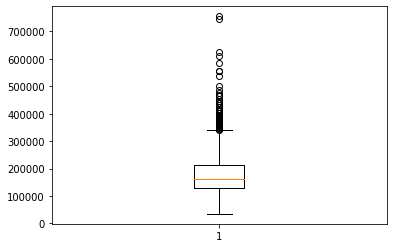

In [16]:
# Let's do a boxplot to see the outliers from the sales column

plt.boxplot(sales_price)
plt.show()

We can see that there are a lot of outliers, let's count and see how many they are.

In [17]:
outlier_lower = Q1 - 1.5*(Q3 - Q1)
outlier_upper = Q3 + 1.5*(Q3 - Q1)
print('Upper Outlier:',outlier_lower)
print('Lower Outlier:',outlier_upper)

Upper Outlier: 3937.5
Lower Outlier: 340037.5


In [18]:
lower_limit_outliers = sales_price[sales_price < outlier_lower].count()
upper_limit_outliers = sales_price[sales_price > outlier_upper].count()
print("lower_limit_outliers:", lower_limit_outliers)
print("upper_limit_outliers:", upper_limit_outliers)
print("total outliers:", upper_limit_outliers + lower_limit_outliers)

lower_limit_outliers: 0
upper_limit_outliers: 61
total outliers: 61


We've found a total of 61 outliers

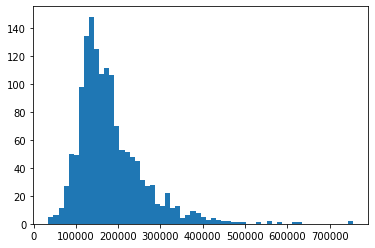

In [19]:
# Let's plot a histogram to inspect the skewness of the Sales price column
plt.hist(sales_price, bins=60)
plt.show()

In [25]:
sales_mode = sales_price.mode()
print(mode[0])

140000


We can now see that our Histogram is positively skewed meaning that the Mode is greater than the Median and the Median is less than the mean.

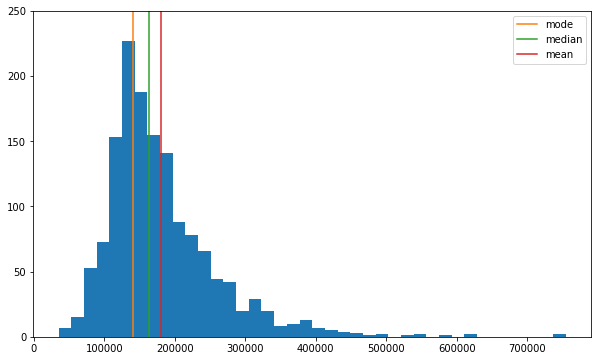

In [26]:
# Let's now plot a Histogram that shows the mean, median and mode.
plt.figure(figsize=(10, 6)) 
plt.hist(sales_price, bins=40)
plt.plot([sales_mode]*300, range(300), label='mode') 
plt.plot([sales_median]*300, range(300), label='median')
plt.plot([sales_mean]*300, range(300), label='mean')
plt.ylim(0, 250)
plt.legend()
plt.show()

In [27]:
# Variance of the Sales column
variance = sales_price.var()
print(variance)

6311111264.297451


In [29]:
# Standard Deviation of the sales column
from math import sqrt

std = sqrt(variance)
print(std)

79442.50288288663


In [30]:
# Correlation between Sales price and Living Room
living_room = data.GrLivArea
np.corrcoef(sales_price, living_room)[0, 1] #Pearson product-moment of the co-efficients

0.7086244776126523

             LotArea  GrLivArea  GarageArea  SalePrice
LotArea     1.000000   0.263116    0.180403   0.263843
GrLivArea   0.263116   1.000000    0.468997   0.708624
GarageArea  0.180403   0.468997    1.000000   0.623431
SalePrice   0.263843   0.708624    0.623431   1.000000


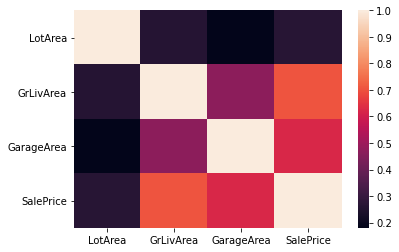

In [32]:
# Correlation between SalesPrice, GarageArea, LotArea and Living room
import seaborn as sns
x = data[['LotArea', 'GrLivArea', 'GarageArea','SalePrice']]
corr = x.corr() #Finds the correlation excluding NaNs
sns.heatmap(corr)
print(corr)